## Классификация при помощи CNN.
На занятии по классификации временных рядов мы разобрали подход, основанный на мере расстояния DTW. Другое семейство алгоритмов основано на вычислении признаков по скользящему окну, например, автоматическая генерация признаков при помощи CNN. В задании вам предлагается разработать baseline решение для классификации рядов из датасета human activity recognition (https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) при помощи CNN сети. В качестве базовой архитектуры будем использовать наработки с семинара по предсказанию при помощи CNN, где в последнем слое используется softmax в качестве функции активации.

In [70]:
from typing import Tuple

In [71]:
import numpy as np
import pandas as pd
import keras
from keras.utils import to_categorical

### 1. Считаем данные  
- Фичи сразу решейпнем, добавив размерность для свёрточного слоя  
- Лейблы принимают значения от 1 до 6. Для корректного расчёта моделью мы отнимем от ниx 1 (превратим в range(6)) и заэнкодим в категориальный таргет.

In [72]:
def read_data(train_or_test: str) -> Tuple[np.array, np.array]:
    a = []
    with open(f'../data/UCI_HAR_dataset/{train_or_test}/X_{train_or_test}.txt', 'r') as f:
        for line in f:
            a.append([float(i) for i in line.strip().split()])

    X = np.vstack(a)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    y = to_categorical(
        np.loadtxt(f'../data/UCI_HAR_dataset/{train_or_test}/y_{train_or_test}.txt', delimiter=' ') - 1
    )
    
    return X, y

In [73]:
X_train[0]

array([[ 1.2467886 ],
       [ 1.1749374 ],
       [ 1.0688188 ],
       [ 0.96431914],
       [ 0.89521856],
       [ 0.79047285],
       [ 0.72088513],
       [ 0.68801032],
       [ 0.58798842],
       [ 0.51849419],
       [ 0.45331537],
       [ 0.34685235],
       [ 0.24508363],
       [ 0.17568289],
       [ 0.07438655],
       [-0.03247996],
       [-0.10185117],
       [-0.21299372],
       [-0.28569621],
       [-0.39116525],
       [-0.49635382],
       [-0.56662551],
       [-0.67082995],
       [-0.73895132],
       [-0.84422354],
       [-0.94760624],
       [-1.0139562 ],
       [-1.0834258 ],
       [-1.1895296 ],
       [-1.2918052 ],
       [-1.3558473 ],
       [-1.3788956 ],
       [-1.3689264 ],
       [-1.3848004 ],
       [-1.3285328 ],
       [-1.311655  ],
       [-1.3165314 ],
       [-1.2953234 ],
       [-1.2931239 ],
       [-1.2865352 ],
       [-1.3218604 ],
       [-1.3072314 ],
       [-1.2882918 ],
       [-1.2533897 ],
       [-1.2860972 ],
       [-1

In [74]:
X_train, y_train = read_data('train')
X_test, y_test = read_data('test')

<AxesSubplot:>

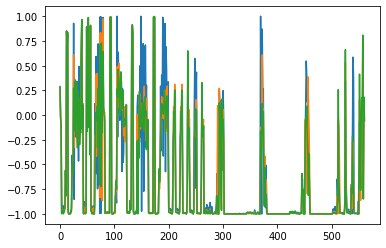

In [16]:
pd.Series(X_train[0].flatten()).plot()
pd.Series(X_train[1].flatten()).plot()
pd.Series(X_train[2].flatten()).plot()

<AxesSubplot:>

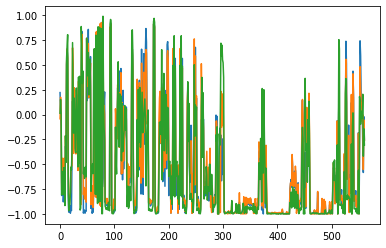

In [88]:
pd.Series(X_train[30].flatten()).plot()
pd.Series(X_train[31].flatten()).plot()
pd.Series(X_train[32].flatten()).plot()

In [17]:
y_train[0], y_train[1], y_train[2]

(array([0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0.], dtype=float32))

### 2. Постройте базовую CNN модель.

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import Callback
from tqdm.notebook import tqdm

1. Задайте модель Sequential
2. Добавьте входной сверточный слой Conv1D (укажите нужный input_shape)
3. Добавьте слой Flatten, чтобы можно было передать выход со сверточного слоя на вход полносвязному
4. Добавьте полносвязный слой с софтмаксом
5. Соберите модель, в качестве метода оптимизации укажите adam, в качестве функции потерь категориальную кроссэнтропию.
6. Обучите модель

In [48]:
# your code here
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(561,1)))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [50]:
# для удобства вывода прогресса, данный класс можете добавить 

class my_tqdm_callback(Callback):
    def on_train_begin(self, logs=None):
        print('Start train')
    def on_epoch_end(self, epoch, logs=None):
        pbar.update()
    def on_train_end(self, logs=None):
        print('Train completed successfully!')

In [71]:
EPOCHS = 100
pbar = tqdm(total=EPOCHS, desc='CNN train')
model.fit(X_train, y_train, epochs=EPOCHS, verbose=0, callbacks=[my_tqdm_callback()]);

CNN train:   0%|          | 0/100 [00:00<?, ?it/s]

Start train
Train completed successfully!


In [72]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))
print('Confusion matrix:\n',confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       496
           1       0.96      0.95      0.95       471
           2       1.00      0.96      0.98       420
           3       0.98      0.89      0.93       491
           4       0.91      0.98      0.94       532
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion matrix:
 [[491   4   1   0   0   0]
 [ 24 447   0   0   0   0]
 [  5  13 402   0   0   0]
 [  0   4   0 436  51   0]
 [  1   0   0   9 522   0]
 [  0   0   0   0   0 537]]


### 3. Попробуйте добавить дополнительный свероточный слой, MaxPooling, и пару промежуточных полносвязный слоев. 

In [20]:
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(561,1)))
model.add(Conv1D(32, 4, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [ ]:
EPOCHS = 100
pbar = tqdm(total=EPOCHS, desc='CNN train')
model.fit(X_train, y_train, epochs=EPOCHS, verbose=0, callbacks=[my_tqdm_callback()]);

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))
print('Confusion matrix:\n',confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       496
           1       0.94      0.95      0.95       471
           2       1.00      0.95      0.98       420
           3       0.97      0.90      0.93       491
           4       0.91      0.97      0.94       532
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion matrix:
 [[485  11   0   0   0   0]
 [ 23 448   0   0   0   0]
 [  4  16 400   0   0   0]
 [  0   0   0 440  51   0]
 [  1   0   0  15 516   0]
 [  0   0   0   0   0 537]]


### 4. Попробуйте сравнить качество с базовым dtw, используя fastdtw.

In [84]:
import fastdtw

#### Напишите функцию get_label, возвращающую соответсвующий класс для ряда из X_test
* принимает на вход ряд из X_test
* проходится по всем рядам из X_train
* считает dtw
* возвращает y из y_train, соответвующий минимальному dtw

In [85]:
def get_label(ts_test: np.array) -> np.array:
    for ts_ref, y_ref in zip(X_train, y_train):
        min_dtw = np.inf
        min_y = None
        dtw, _ = fastdtw.fastdtw(ts_test.flatten(), ts_ref.flatten())
        if dtw < min_dtw:
            min_dtw = dtw
            min_y = y_ref
    
    return min_y

In [101]:
X_test[0].flatten()

array([ 2.5717778e-01, -2.3285230e-02, -1.4653762e-02, -9.3840400e-01,
       -9.2009078e-01, -6.6768331e-01, -9.5250112e-01, -9.2524867e-01,
       -6.7430222e-01, -8.9408755e-01, -5.5457721e-01, -4.6622295e-01,
        7.1720847e-01,  6.3550240e-01,  7.8949666e-01, -8.7776423e-01,
       -9.9776606e-01, -9.9841381e-01, -9.3434525e-01, -9.7566897e-01,
       -9.4982365e-01, -8.3047780e-01, -1.6808416e-01, -3.7899553e-01,
        2.4621698e-01,  5.2120364e-01, -4.8779311e-01,  4.8228047e-01,
       -4.5462113e-02,  2.1195505e-01, -1.3489443e-01,  1.3085848e-01,
       -1.4176313e-02, -1.0597085e-01,  7.3544013e-02, -1.7151642e-01,
        4.0062978e-02,  7.6988933e-02, -4.9054573e-01, -7.0900265e-01,
        9.3648925e-01, -2.8271916e-01,  1.1528825e-01, -9.2542727e-01,
       -9.3701413e-01, -5.6428842e-01, -9.3001992e-01, -9.3782195e-01,
       -6.0558770e-01,  9.0608259e-01, -2.7924413e-01,  1.5289519e-01,
        9.4446140e-01, -2.6215956e-01, -7.6161676e-02, -1.7826920e-02,
      

#### Пройдитесь по 50-100 рядам из X_test (примерное время 5-15 минут) и оцените точность классификации

In [90]:
y_test[80:120]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0.

In [86]:
from tqdm import tqdm_notebook

y_pred = []

for _, ts_test in tqdm_notebook(zip(range(50), X_test[80:])):
    y_pred.append(get_label(ts_test))

<ipython-input-86-fc540b58e0d5>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _, ts_test in tqdm_notebook(zip(range(50), X_test[80:])):


0it [00:00, ?it/s]

In [87]:
y_pred

[array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 

In [82]:
y_train[80:120]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1.

### Выводы: 
- модель явно обнаружила какую-то структуру в данных и выдала точность 96%
- доли ошибок первого и второго рода близки по всем классам
- мы идеально предсказываем, когда человек ЛЕЖИТ
- хуже всего нам удаётся предсказать, когда человек СИДИТ (в 51 случае из 440 модель говорит, что он СТОИТ)

### Классификация датасета BeetlyFly при помощи CNN

In [105]:
with open('../data/beetle_fly/BeetleFly_TRAIN.ts') as f:
    data = f.read().split('\n')[11:-1]
    
X_train = []
y_train = []

for row in data:
    ts, label = row.split(':') 
    ts = np.array(list(map(float, ts.split(','))))
    X_train.append(ts)
    y_train.append(label)
    
X_train = np.vstack(X_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
y_train = to_categorical(np.fromiter(map(float, y_train), dtype=np.int16) - 1)

In [106]:
with open('../data/beetle_fly/BeetleFly_TEST.ts') as f:
    data = f.read().split('\n')[11:-1]
    
X_test = []
y_test = []

for row in data:
    ts, label = row.split(':') 
    ts = np.array(list(map(float, ts.split(','))))
    X_test.append(ts)
    y_test.append(label)
    
X_test = np.vstack(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_test = to_categorical(np.fromiter(map(float, y_test), dtype=np.int16) - 1)

In [108]:
X_train.shape

(20, 512, 1)

In [109]:
# your code here
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(512,1)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [110]:
EPOCHS = 100
pbar = tqdm(total=EPOCHS, desc='CNN train')
model.fit(X_train, y_train, epochs=EPOCHS, verbose=0, callbacks=[my_tqdm_callback()]);

CNN train:   0%|          | 0/100 [00:00<?, ?it/s]

Start train
Train completed successfully!


In [111]:
pred = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [62]:
from sklearn.metrics import classification_report

#### Как можно заметить, точность классификации при помощи CNN заметно опережает точно DTW (была максимум 0.70)